In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import numpy as np
print("Current working directory:", os.getcwd())

Current working directory: c:\Users\andyd\Udesa\Machine Learning\ProyectoML\entrenamientos_df_intermedio


In [35]:
# Cargar dataset
dataset1 = pd.read_csv('../dataset_basico.csv')
dataset2 = pd.read_csv('../intermedio_sin_outliers.csv')
dataset3 = pd.read_csv('../dataset_final.csv')

X1, y1 = dataset1.drop(columns='Precio_usd'), dataset1['Precio_usd']
X2, y2 = dataset2.drop(columns='Precio_usd'), dataset2['Precio_usd']
X3, y3 = dataset3.drop(columns='Precio_usd'), dataset3['Precio_usd']


x1_train, x1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
x2_train, x2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
x3_train, x3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [36]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import randint, uniform
import numpy as np

# RMSE negativo para GridSearch
neg_rmse = make_scorer(
    lambda y_true, y_pred: -np.sqrt(mean_squared_error(y_true, y_pred)),
    greater_is_better=True
)

# Hiperparámetros a buscar
param_dist = {
    "n_estimators":      randint(200, 1200),
    "max_depth":         randint(4, 40),
    "max_features":      uniform(0.3, 0.7),
    "min_samples_split": randint(2, 15),
    "min_samples_leaf":  randint(1, 10)
}


In [37]:
search1 = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42, oob_score=True, n_jobs=-1),
    param_distributions=param_dist,
    n_iter=5,
    scoring=neg_rmse,
    cv=5,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

search1.fit(x1_train, y1_train)
print("✅ Dataset 1 - Mejor RMSE CV:", -search1.best_score_)
print("Hiperparámetros óptimos modelo 1:", search1.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
✅ Dataset 1 - Mejor RMSE CV: 4804.7134497215975
Hiperparámetros óptimos modelo 1: {'max_depth': 27, 'max_features': 0.755621931064197, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 543}


In [38]:
search2 = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42, oob_score=True, n_jobs=-1),
    param_distributions=param_dist,
    n_iter=5,
    scoring=neg_rmse,
    cv=5,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

search2.fit(x2_train, y2_train)
print("✅ Dataset 2 - Mejor RMSE CV:", -search2.best_score_)
print("Hiperparámetros óptimos modelo 2:", search2.best_params_)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
✅ Dataset 2 - Mejor RMSE CV: 6541.077630456377
Hiperparámetros óptimos modelo 2: {'max_depth': 27, 'max_features': 0.755621931064197, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 543}


In [39]:
search3 = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42, oob_score=True, n_jobs=-1),
    param_distributions=param_dist,
    n_iter=5,
    scoring=neg_rmse,
    cv=5,
    random_state=42,
    verbose=1,
    n_jobs=-1
)
search3.fit(x3_train, y3_train)
print("✅ Dataset 3 - Mejor RMSE CV:", -search3.best_score_)
print("Hiperparámetros óptimos modelo 3:", search3.best_params_)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
✅ Dataset 3 - Mejor RMSE CV: 7127.88751804735
Hiperparámetros óptimos modelo 3: {'max_depth': 33, 'max_features': 0.44863737747479326, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 659}


In [40]:
# Modelo 1
model_1 = search1.best_estimator_
model_1.fit(x1_train, y1_train)
y1_pred = model_1.predict(x1_test)
rmse_1 = np.sqrt(mean_squared_error(y1_test, y1_pred))
mae_1 = mean_absolute_error(y1_test, y1_pred)
r2_1 = r2_score(y1_test, y1_pred)
oob1 = model_1.oob_score_

# Modelo 2
model_2 = search2.best_estimator_
model_2.fit(x2_train, y2_train)
y2_pred = model_2.predict(x2_test)
rmse_2 = np.sqrt(mean_squared_error(y2_test, y2_pred))
mae_2 = mean_absolute_error(y2_test, y2_pred)
r2_2 = r2_score(y2_test, y2_pred)
oob2 = model_2.oob_score_

#Modelo 3
model_3 = search3.best_estimator_
model_3.fit(x3_train, y3_train)
y3_pred = model_3.predict(x3_test)
rmse_3 = np.sqrt(mean_squared_error(y3_test, y3_pred))
mae_3 = mean_absolute_error(y3_test, y3_pred)
r2_3 = r2_score(y3_test, y3_pred)
oob3 = model_3.oob_score_

In [41]:
import pandas as pd

resultados = pd.DataFrame({
    'Modelo': ['Modelo 1', 'Modelo 2',"Modelo 3"],
    'RMSE (USD)': [rmse_1, rmse_2, rmse_3],
    'MAE (USD)': [mae_1, mae_2, mae_3],
    'R²': [r2_1, r2_2, r2_3],
    'OOB R²': [oob1, oob2, oob3]  # Si uno no tiene, será NaN
})

# Mostrar con redondeo
print(resultados.round(2))


     Modelo  RMSE (USD)  MAE (USD)    R²  OOB R²
0  Modelo 1     4578.76    3000.81  0.81    0.80
1  Modelo 2     6731.89    3000.84  0.87    0.89
2  Modelo 3     7342.84    3314.05  0.85    0.87


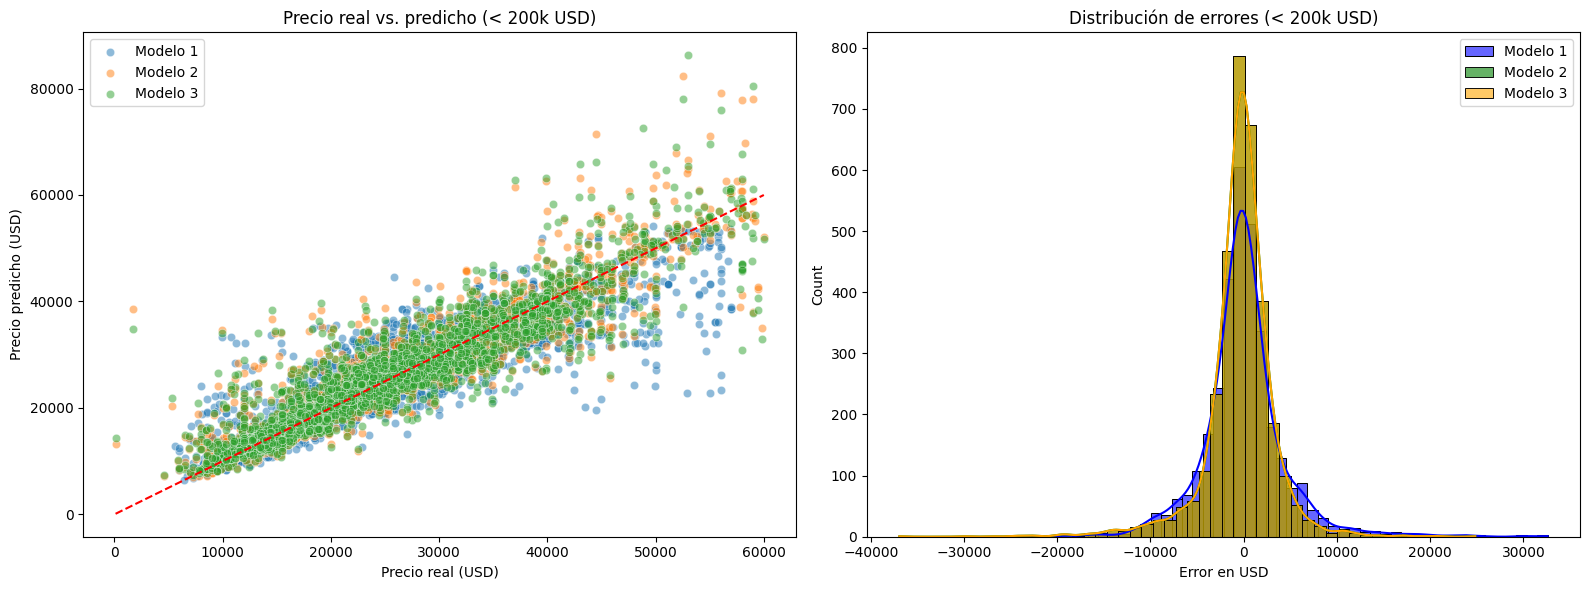

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, r2_score

# ------------------------
# Filtrar solo precios reales < 200,000
# ------------------------
filtro_1 = y1_test < 60000
filtro_2 = y2_test < 60000
filtro_3 = y3_test < 60000

y1_test_f = y1_test[filtro_1]
y1_pred_f = y1_pred[filtro_1]

y2_test_f = y2_test[filtro_2]
y2_pred_f = y2_pred[filtro_2]

y3_test_f = y3_test[filtro_3]
y3_pred_f = y3_pred[filtro_3]



errores_1 = y1_test_f - y1_pred_f
errores_2 = y2_test_f - y2_pred_f
errores_3 = y3_test_f - y3_pred_f

# Métricas con los datos filtrados
mae1 = mean_absolute_error(y1_test_f, y1_pred_f)
r21 = r2_score(y1_test_f, y1_pred_f)

mae2 = mean_absolute_error(y2_test_f, y2_pred_f)
r22 = r2_score(y2_test_f, y2_pred_f)

mae3 = mean_absolute_error(y3_test, y3_pred)
r23 = r2_score(y3_test, y3_pred)
# ------------------------
# Crear subplots
# ------------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Real vs. Predicho
sns.scatterplot(ax=axes[0], x=y1_test_f, y=y1_pred_f, label='Modelo 1', alpha=0.5)
sns.scatterplot(ax=axes[0], x=y2_test_f, y=y2_pred_f, label='Modelo 2', alpha=0.5)
sns.scatterplot(ax=axes[0], x=y3_test_f, y=y3_pred_f, label='Modelo 3', alpha=0.5)

# Línea ideal
min_val = min(y1_test_f.min(), y2_test_f.min())
max_val = max(y1_test_f.max(), y2_test_f.max())
axes[0].plot([min_val, max_val], [min_val, max_val], '--', color='red')

axes[0].set_title("Precio real vs. predicho (< 200k USD)")
axes[0].set_xlabel("Precio real (USD)")
axes[0].set_ylabel("Precio predicho (USD)")
axes[0].legend()

# Gráfico 2: Histograma de errores
sns.histplot(errores_1, bins=50, kde=True, label='Modelo 1', ax=axes[1], color='blue', alpha=0.6)
sns.histplot(errores_2, bins=50, kde=True, label='Modelo 2', ax=axes[1], color='green', alpha=0.6)
sns.histplot(errores_2, bins=50, kde=True, label='Modelo 3', ax=axes[1], color='orange', alpha=0.6)

axes[1].set_title("Distribución de errores (< 200k USD)")
axes[1].set_xlabel("Error en USD")
axes[1].legend()

plt.tight_layout()
plt.show()


